# ** Introduction to Machine Learning (lab 1)**

### *(Due on 16th October)*

The goal of this task is to familiarize with the Colab environment and with [scikit-learn](https://scikit-learn.org/stable/user_guide.html), and to gain some experience on learning simple predictive models.

We will focus on the training error only and consider a training dataset, i.e., we will not look at generalization error on testing data.

Consider the LIBSVM repository of datasets:
http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/


In [1]:
# Example of downloading a dataset
!wget -t inf https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a

--2023-11-15 14:15:37--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114818 (112K)
Saving to: ‘a1a’

a1a                 100%[===================>] 112.13K   236KB/s    in 0.5s    

2023-11-15 14:15:39 (236 KB/s) - ‘a1a’ saved [114818/114818]



In [2]:
# Example of loading a dataset
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file("a1a")
print(X_train)

  (0, 2)	1.0
  (0, 10)	1.0
  (0, 13)	1.0
  (0, 18)	1.0
  (0, 38)	1.0
  (0, 41)	1.0
  (0, 54)	1.0
  (0, 63)	1.0
  (0, 66)	1.0
  (0, 72)	1.0
  (0, 74)	1.0
  (0, 75)	1.0
  (0, 79)	1.0
  (0, 82)	1.0
  (1, 2)	1.0
  (1, 5)	1.0
  (1, 16)	1.0
  (1, 26)	1.0
  (1, 34)	1.0
  (1, 39)	1.0
  (1, 56)	1.0
  (1, 62)	1.0
  (1, 68)	1.0
  (1, 72)	1.0
  (1, 73)	1.0
  :	:
  (1603, 21)	1.0
  (1603, 35)	1.0
  (1603, 41)	1.0
  (1603, 47)	1.0
  (1603, 64)	1.0
  (1603, 70)	1.0
  (1603, 72)	1.0
  (1603, 73)	1.0
  (1603, 75)	1.0
  (1603, 79)	1.0
  (1603, 82)	1.0
  (1604, 3)	1.0
  (1604, 9)	1.0
  (1604, 14)	1.0
  (1604, 23)	1.0
  (1604, 37)	1.0
  (1604, 40)	1.0
  (1604, 51)	1.0
  (1604, 65)	1.0
  (1604, 66)	1.0
  (1604, 71)	1.0
  (1604, 73)	1.0
  (1604, 75)	1.0
  (1604, 81)	1.0
  (1604, 82)	1.0


## **1. Regression Task**

Choose a regression dataset and apply linear regression on a random subset of
the training set of increasing size. You should select training sets that include more and more data points.

**1.1.** Plot the mean square error (MSE) on the training set as a function of the number of samples $m$ (i.e. data points in the training set).

[*You can use [matplotlib](https://matplotlib.org/) for plotting. You can average curves over several permutations of the samples in the training dataset to obtain smoother curves, or even use errorbars.*]

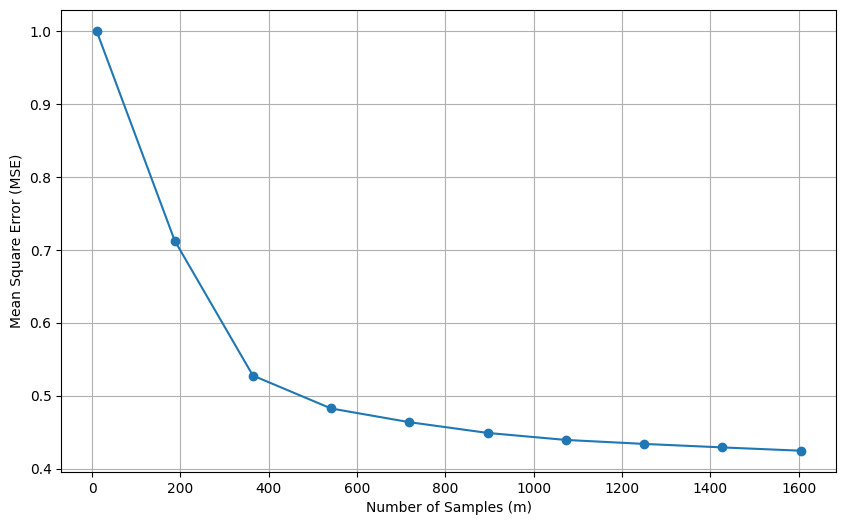

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

n_samples = X_train.shape[0]  # Total number of data points
n_subsets = 10  # Number of subsets to create
m = np.linspace(10, n_samples, n_subsets, dtype=int)  # Increasing subset sizes

# Lists to store MSE for different subset sizes
mse_scores = []

# Loop through different subset sizes
for subset_size in m:
    mse_subset = []  # Store MSE values for a single subset size

    # Perform multiple iterations to get smoother curves
    n_iterations = 10
    for _ in range(n_iterations):
        # Randomly select a subset of data points
        random_indices = np.random.choice(n_samples, subset_size, replace=False)
        X_subset = X_train[random_indices]
        y_subset = y_train[random_indices]

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X_subset, y_subset)

        # Predict on the entire training set
        y_pred = model.predict(X_train)

        # Calculate the MSE
        mse = mean_squared_error(y_train, y_pred)
        mse_subset.append(mse)

    # Calculate mean MSE for the current subset size
    mean_mse = np.mean(mse_subset)
    mse_scores.append(mean_mse)

# Plot the MSE as a function of the number of samples (m)
plt.figure(figsize=(10, 6))
plt.plot(m, mse_scores, marker='o')
plt.xlabel('Number of Samples (m)')
plt.ylabel('Mean Square Error (MSE)')
plt.grid()
plt.show()


**1.2.** Plot the cpu-time as a function of $m$.


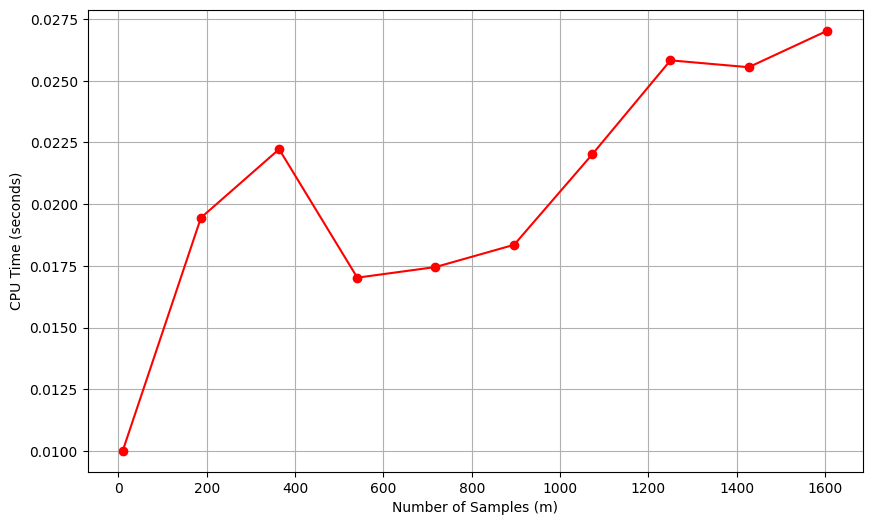

In [ ]:
import time

# Lists to store MSE for different subset sizes
mse_scores = []

# Function to measure CPU time
def measure_cpu_time(subset_size):
    start_time = time.time()

    # Randomly select a subset of data points
    random_indices = np.random.choice(n_samples, subset_size, replace=False)
    X_subset = X_train[random_indices]
    y_subset = y_train[random_indices]

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_subset, y_subset)

    # Predict on the entire training set
    y_pred = model.predict(X_train)

    # Calculate the MSE
    mse = mean_squared_error(y_train, y_pred)

    end_time = time.time()
    execution_time = end_time - start_time

    mse_scores.append(mse)  # Append MSE to the list

    return execution_time

# Loop through different subset sizes
execution_times = [measure_cpu_time(subset_size) for subset_size in m]

# Plot the CPU time as a function of the number of samples (m)
plt.figure(figsize=(10, 6))
plt.plot(m, execution_times, marker='o', color='r')
plt.xlabel('Number of Samples (m)')
plt.ylabel('CPU Time (seconds)')
plt.grid()
plt.show()


**1.3.** Explain in detail the behaviour of both curves and relate this behavior with what you would expect from theory.

The **MSE vs. Number of Samples** curve (the first graph) typically shows a decreasing trend. As the number of samples (m) increases, the MSE tends to decrease. This means that the model's predictive accuracy improves as you have more data to train on. The sample mean (in this case, the MSE) tends to converge to the true population mean, therefore with more data, the model is better able to generalize and make more accurate predictions.

The **CPU Time vs. Number of Samples** curve (the second graph) typically shows an increasing trend. As the number of samples (m) increases, the CPU time tends to increase. This behavior is expected and can be attributed to the increased computational load as you work with larger datasets. When you have more data points (i.e., larger m), the traing time, prediction time, data handling and contribute to an increase in CPU time.

In summary, the decreasing MSE and increasing CPU time as the dataset size (m) increases are expected behaviors. Larger datasets typically lead to more accurate models but require more computational resources and time. The specific shape of these curves may vary depending on the complexity of the model and the nature of the data, but the general trends are consistent with theoretical expectations: trade-off between accuracy and computational cost.

**1.4.** Explore how the learned weights change as a function of $m$. Can you find an interpretation for the learned weights?

[*You can, for example, plot the value of each weight (in a different colour) as a function of $m$*].

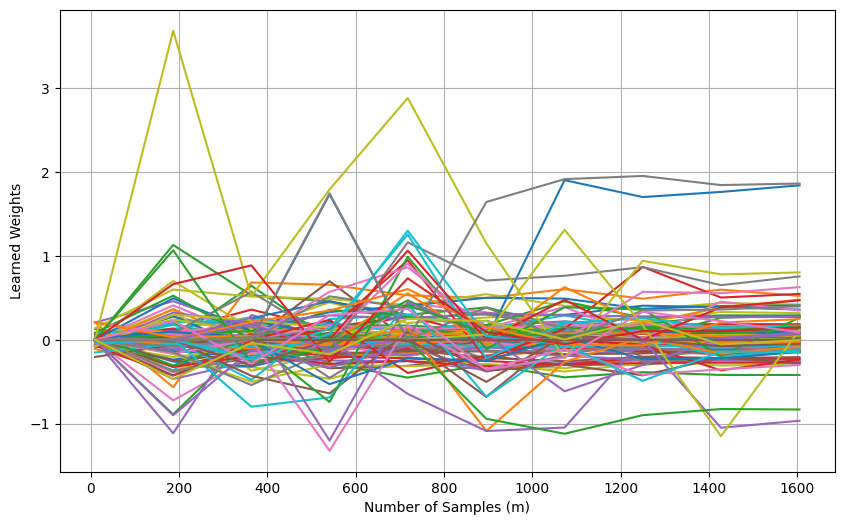

In [ ]:
# Function to calculate and record the learned weights
def record_weights(subset_size):
    # Randomly select a subset of data points
    random_indices = np.random.choice(n_samples, subset_size, replace=False)
    X_subset = X_train[random_indices]
    y_subset = y_train[random_indices]

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_subset, y_subset)

    # Record the learned coefficients (weights)
    return model.coef_

# Create a list to store the learned weights for each subset size
learned_weights = []

# Loop through different subset sizes and record the learned weights
for subset_size in m:
    weights = record_weights(subset_size)
    learned_weights.append(weights)

# Plot the learned weights for each feature as a function of the number of samples (m)
num_features = X_train.shape[1]  # Number of features

plt.figure(figsize=(10, 6))
for feature_index in range(num_features):
    plt.plot(m, [weights[feature_index] for weights in learned_weights])

plt.xlabel('Number of Samples (m)')
plt.ylabel('Learned Weights')
plt.grid()
plt.show()

# No easy to see interpretation trend for the learned weights

## **2. Classification Task**

Choose a classification dataset and apply logistic regression. Repeat the previous steps using the mean accuracy instead of the squared loss.

**2.1.** Plot the mean accuracy on the training set as a function
of the number of samples $m$, i.e., data points in the training set.

[*You can use the scikit-learn implementation of* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)*, but check carefully the default parameter values. Do not use regularization*].

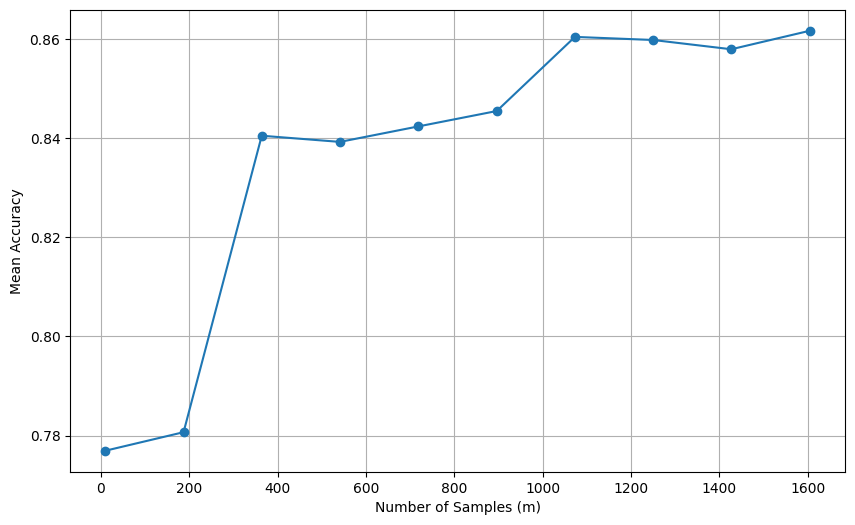

In [ ]:
from sklearn.linear_model import LogisticRegression

# Lists to store mean accuracy for different subset sizes
accuracy_scores = []

# Create a logistic regression model without regularization
model = LogisticRegression(penalty=None, max_iter=1000)

# Loop through different subset sizes
for subset_size in m:
    # Randomly select a subset of data points
    random_indices = np.random.choice(n_samples, subset_size, replace=False)
    X_subset = X_train[random_indices]
    y_subset = y_train[random_indices]

    # Fit the logistic regression model
    model.fit(X_subset, y_subset)

    # Evaluate mean accuracy on the entire training set
    accuracy = model.score(X_train, y_train)
    accuracy_scores.append(accuracy)

# Plot the mean accuracy as a function of the number of samples (m)
plt.figure(figsize=(10, 6))
plt.plot(m, accuracy_scores, marker='o')
plt.xlabel('Number of Samples (m)')
plt.ylabel('Mean Accuracy')
plt.grid()
plt.show()


**2.2.** Plot the cpu-time as a function of $m$.

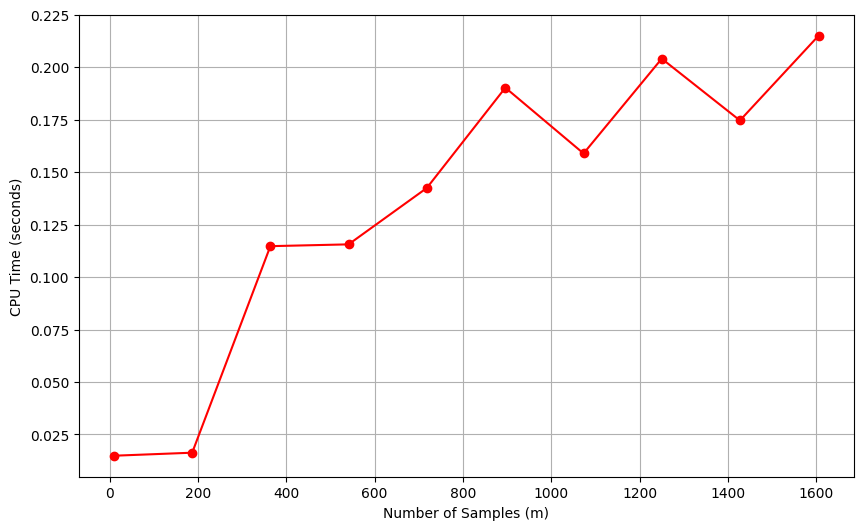

In [ ]:
# Lists to store CPU time for different subset sizes
cpu_times = []

# Create a logistic regression model without regularization
model = LogisticRegression(penalty=None,  max_iter=1000)

# Loop through different subset sizes
for subset_size in m:
    # Record the start time
    start_time = time.time()

    # Randomly select a subset of data points
    random_indices = np.random.choice(n_samples, subset_size, replace=False)
    X_subset = X_train[random_indices]
    y_subset = y_train[random_indices]

    # Fit the logistic regression model
    model.fit(X_subset, y_subset)

    # Record the end time
    end_time = time.time()

    # Calculate the execution time and append it to the list
    execution_time = end_time - start_time
    cpu_times.append(execution_time)

# Plot the CPU time as a function of the number of samples (m)
plt.figure(figsize=(10, 6))
plt.plot(m, cpu_times, marker='o', color='r')
plt.xlabel('Number of Samples (m)')
plt.ylabel('CPU Time (seconds)')
plt.grid()
plt.show()


**2.3.** Explain in detail the behaviour of both curves and relate this behavior with what you would expect from theory.

The **Mean Accuracy vs. Number of Samples** curve typically shows an increasing trend. As the number of samples (m) increases, the mean accuracy tends to improve. This means that the model's predictive accuracy on the training data increases with more data. This behavior is consistent with statistical and machine learning theory. With a larger training dataset, the logistic regression model has more information to learn from, and it can better generalize to unseen data. As the sample size increases, the model is more likely to capture the underlying patterns in the data, resulting in higher accuracy.

The **CPU Time vs. Number of Samples** curve generally shows an increasing trend. As the number of samples (m) increases, the CPU time required for training the logistic regression model tends to increase. This behavior is expected because, as the dataset size grows, the computational load and resource demands also increase. Logistic regression involves numerical optimization processes, and more data requires more iterations to converge to an optimal solution. Additionally, the handling of larger datasets and the matrix operations involved in training the model can become more time-consuming.

In summary, the increasing mean accuracy and CPU time with a growing dataset size are expected behaviors for classification. Larger datasets tend to result in improved model performance, but they also require more computational resources and time.

**2.4.** Explore how the learned weights change as a function of $m$. Can you find
an interpretation for the learned weights?

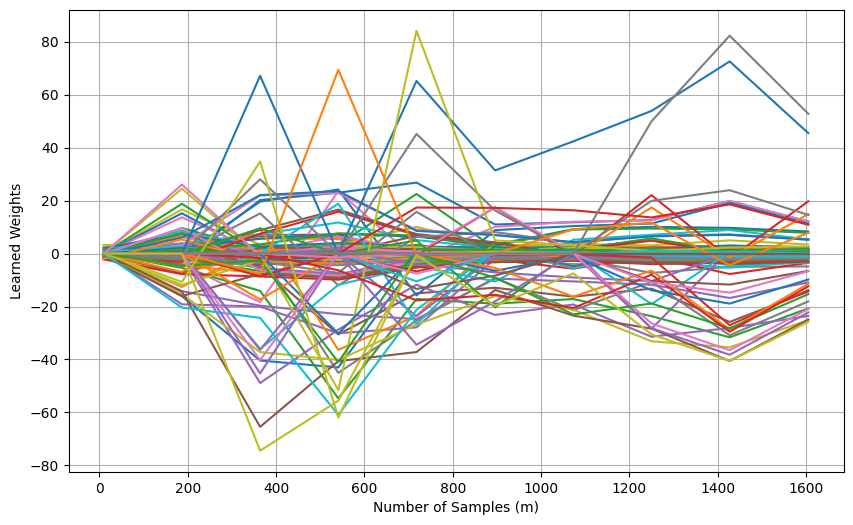

In [ ]:
# Create a logistic regression model without regularization
model = LogisticRegression(penalty=None,  max_iter=1000)

# Function to record learned weights
def record_weights(subset_size):
    # Randomly select a subset of data points
    random_indices = np.random.choice(n_samples, subset_size, replace=False)
    X_subset = X_train[random_indices]
    y_subset = y_train[random_indices]

    # Fit the logistic regression model
    model.fit(X_subset, y_subset)

    # Record the learned coefficients (weights)
    return model.coef_

# Lists to store the learned weights for each feature
learned_weights = [[] for _ in range(X_train.shape[1])]

# Loop through different subset sizes
for subset_size in m:
    weights = record_weights(subset_size)
    for i in range(X_train.shape[1]):  # Loop through features
        learned_weights[i].append(weights[0][i])

# Plot the learned weights for each feature as a function of the number of samples (m)
plt.figure(figsize=(10, 6))
for feature_index in range(X_train.shape[1]):
    plt.plot(m, learned_weights[feature_index])

plt.xlabel('Number of Samples (m)')
plt.ylabel('Learned Weights')
plt.grid()
plt.show()

# No easy to see interpretation trend for the learned weights